In [149]:
from flipper import *
from hades import PowerMap,BinSpec
import flipperPol as fp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/ioa/software/anaconda/anaconda2/envs/20170814/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mean', 'std', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


1. Load in T,E,B maps from before

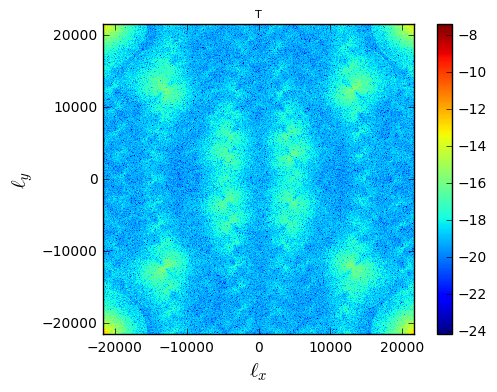

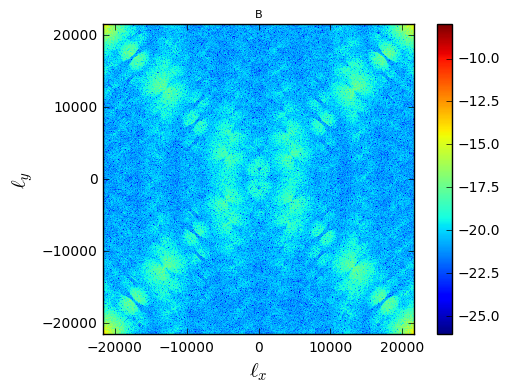

In [2]:
map_id = 210
fT=PowerMap.openPower(map_id,map_type='T')
fB=PowerMap.openPower(map_id,map_type='B')
fT.plot(log=True,show=True,title='T')
fB.plot(log=True,show=True,title='B')

In [3]:
Tmap = liteMap.liteMapFromFits('/data/ohep2/sims/simdata/fvsmapT_00210.fits')
Qmap = liteMap.liteMapFromFits('/data/ohep2/sims/simdata/fvsmapQ_00210.fits')
Umap = liteMap.liteMapFromFits('/data/ohep2/sims/simdata/fvsmapU_00210.fits')
window = liteMap.liteMapFromFits('/data/ohep2/sims/simdata/fvsmapMaskSmoothed_00210.fits')

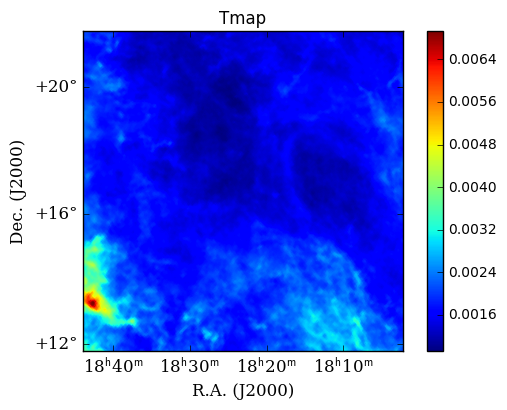

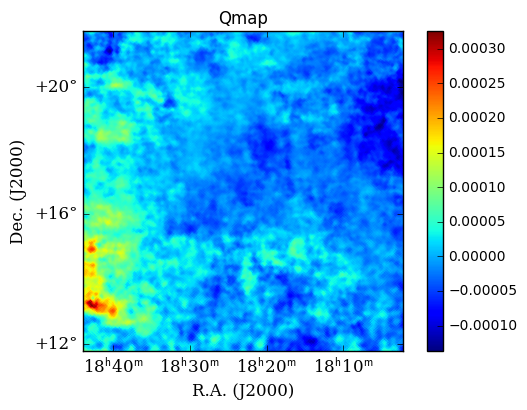

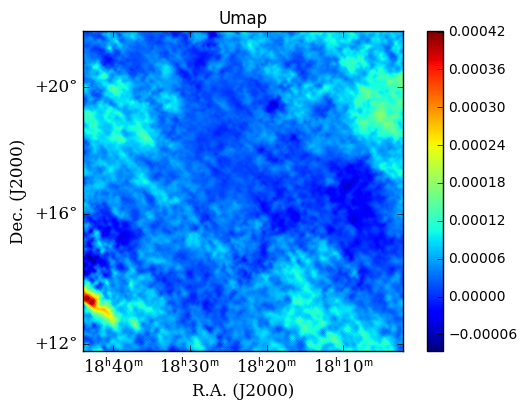

In [4]:
Tmap.plot(useImagePlot=True,title='Tmap')
Qmap.plot(useImagePlot=True,title='Qmap')
Umap.plot(useImagePlot=True,title='Umap')

Try creating maps with slepian tapers

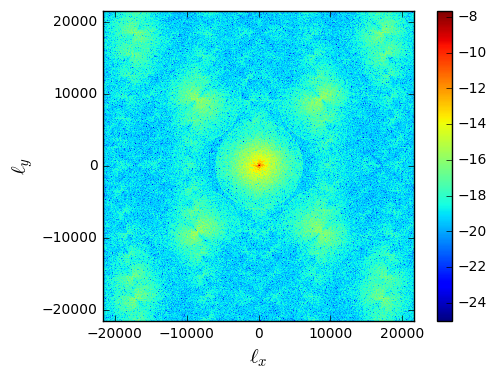

In [5]:
slepT=fp.fftTools.powerFromLiteMap(Tmap,applySlepianTaper=True)
slepT.plot(log=True)

In [6]:
modL,angL=fp.fftPol.makeEllandAngCoordinate(Tmap)
ftT,ftE,ftB = fp.fftPol.TQUtoPureTEB(Tmap,Qmap,Umap,window,modL,angL,method='hybrid')

In [7]:
TT,TE,ET,TB,BT,EE,EB,BE,BB=fp.fftPol.fourierTEBtoPowerTEB(ftT,ftE,ftB,ftT,ftE,ftB)

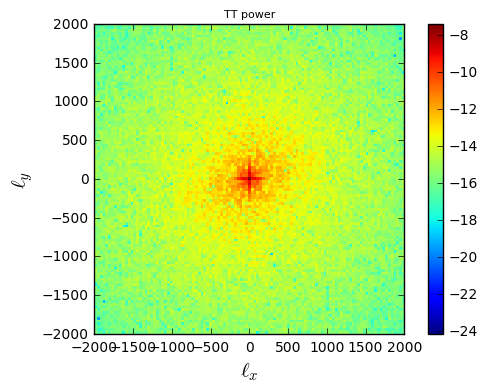

In [11]:
TT.plot(log=True,show=True,zoomUptoL=2000,title='TT power',pngFile='/data/ohep2/TestPngs/TTpower210.jpg') # ,saveFig='/data/ohep2/shrunkBB')

In [147]:
TT.plot??

In [35]:
simpleFT=fftTools.fftFromLiteMap(Tmap)

/home/ohep2/Masters/flipper/python/fftTools.py:174: RuntimeWarning: divide by zero encountered in log
  pImag = numpy.log(numpy.abs(pImag))


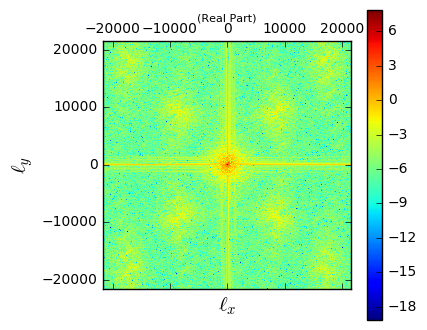

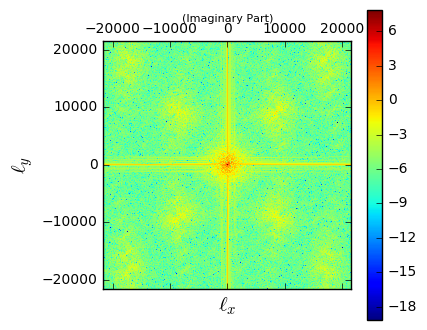

In [36]:
simpleFT.plot(log=True,show=True)

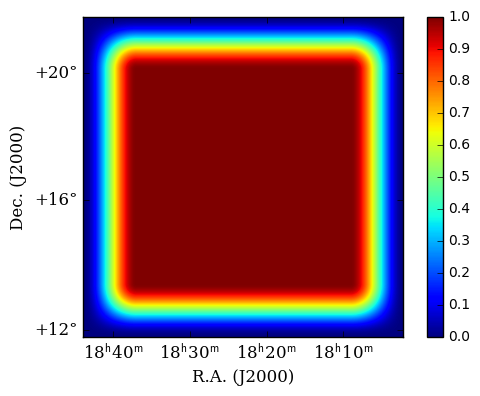

In [37]:
window.plot(show=True,useImagePlot=True)

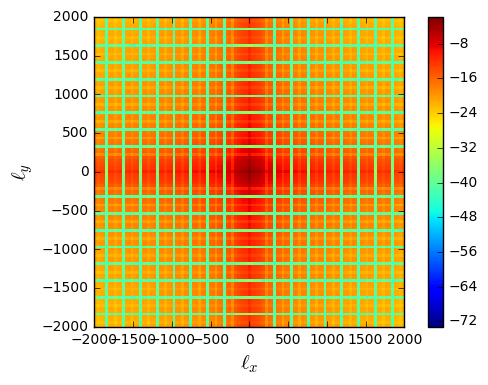

In [155]:
ftwindow=fftTools.powerFromLiteMap(window)
ftwindow.plot(show=True,log=True,zoomUptoL=2000)

In [39]:
Tmap.data

array([[ 0.00367414,  0.00369371,  0.00369371, ...,  0.00206809,
         0.00206809,  0.00206809],
       [ 0.00367414,  0.00367414,  0.00369371, ...,  0.00208376,
         0.00208376,  0.00206809],
       [ 0.00367414,  0.00367414,  0.00367414, ...,  0.00208376,
         0.00208376,  0.00208376],
       ..., 
       [ 0.00229058,  0.0022988 ,  0.0022988 , ...,  0.00124505,
         0.00129156,  0.00129156],
       [ 0.00229058,  0.00229058,  0.0022988 , ...,  0.00124505,
         0.00124505,  0.00129156],
       [ 0.00229058,  0.00229058,  0.00229058, ...,  0.00124505,
         0.00124505,  0.00124505]])

In [42]:
import skimage.transform

In [56]:
rotT=skimage.transform.rotate(Tmap.data,30)

In [57]:
rotTmap = Tmap.copy()
rotTmap.data = rotT

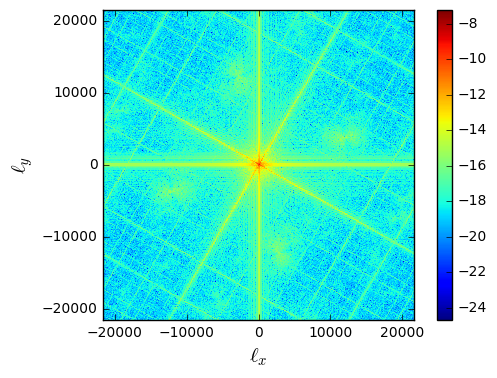

In [58]:
prot=fftTools.powerFromLiteMap(rotTmap)
prot.plot(log=True,show=True)

In [59]:
fRtT,fRtE,fRtB = fp.fftPol.TQUtoPureTEB(rotTmap,Qmap,Umap,window,modL,angL,method='standard')

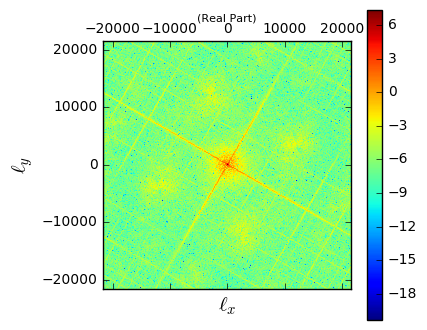

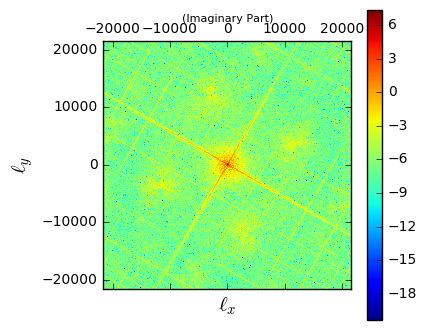

In [60]:
fRtT.plot(show=True,log=True)

In [62]:
Tmap.plot(saveFig=)

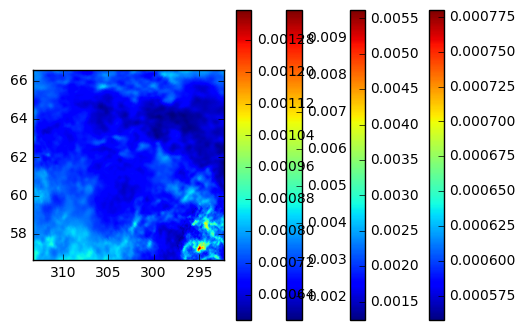

In [64]:
for i in [0,100,200,300]:
    map = liteMap.liteMapFromFits('/data/ohep2/sims/simdata/fvsmapT_'+str(i).zfill(5)+'.fits')
    map.plot(show=False,saveFig='/data/ohep2/'+str(i)+'.png')

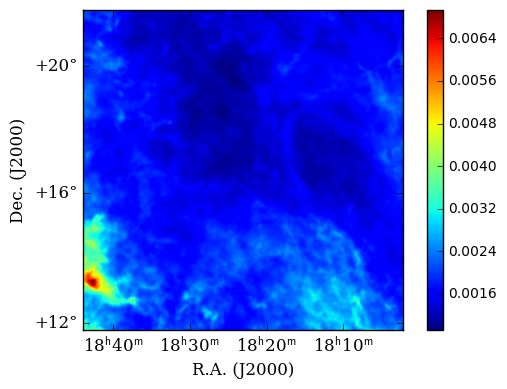

In [65]:
Tmap.plot(useImagePlot=True)

In [81]:
modTT=TT.copy()
modTT.plot??

In [80]:
from fftTools import power2D

In [88]:
modftT = ftT.copy()
modftT.kMap-=mean(ftT.kMap)

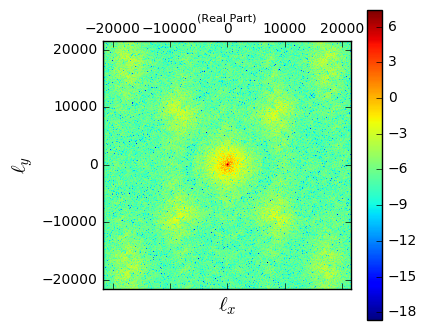

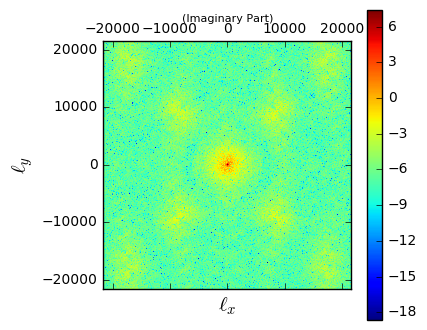

In [90]:
modftT.plot(show=True,log=True)

In [111]:
fp.fftPol.fourierTEBtoPowerTEB??

In [114]:
TT.plot??

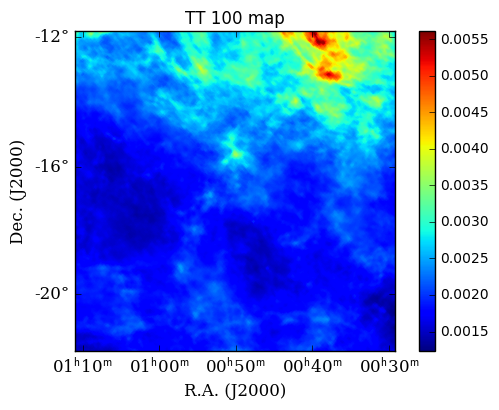

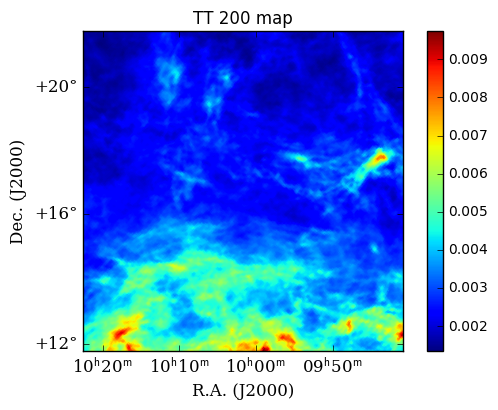

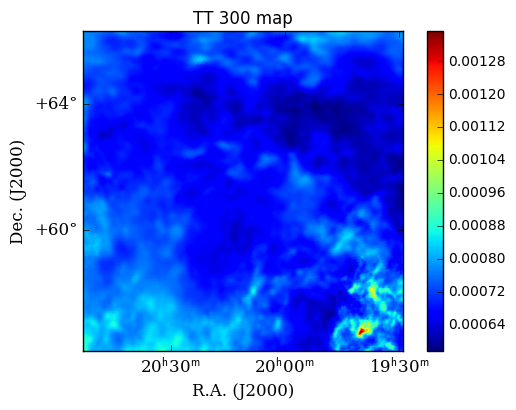

In [108]:
map_id = [100,200,300]
for id in map_id:
    map = liteMap.liteMapFromFits('/data/ohep2/sims/simdata/fvsmapT_'+str(id).zfill(5)+'.fits')
    map.plot(useImagePlot=True,saveFig="Tmap "+str(id)+".jpg",title='TT '+str(id)+' map')

In [18]:
BB.trimAtL??

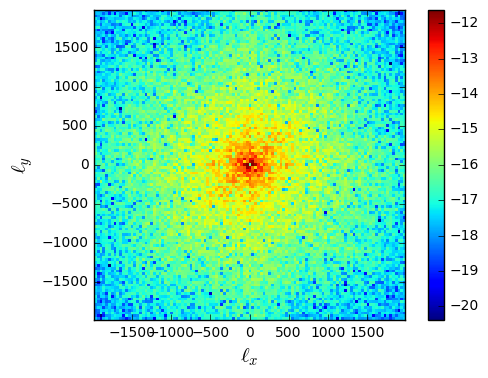

In [17]:
trimBB=BB.trimAtL(2000)
trimEE=EE.trimAtL(2000)
trimEE.plot(show=True,log=True)

In [23]:
a1,_,_=trimBB.meanPowerInAnnulus(500,600)
a2,_,_=trimBB.meanPowerInAnnulus(1900,2000)

In [27]:
float(a1)*550**(2.2)

1.656055563158744e-09

In [28]:
float(a2)*1950**(2.2)

2.792954376412316e-10

In [64]:
L = 1.6e-9
subtrBB = trimBB.copy()
subtrBB.powerMap=np.abs(trimBB.powerMap-L*(1+trimBB.modLMap)**(-2.2))

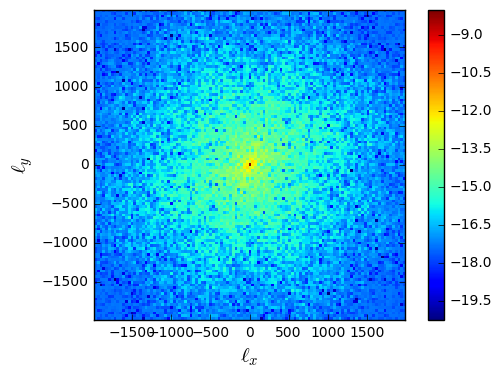

In [63]:
subtrBB.plot(log=True,show=True)

In [137]:
l_bin = []
pow_mean=[]
pow_std=[]
for i in range(5,100):
    mean,std,pix=BB.meanPowerInAnnulus(i*20,(i+1)*20)
    pow_mean.append(mean)
    pow_std.append(std)
    l_bin.append((i+0.5)*20)
    

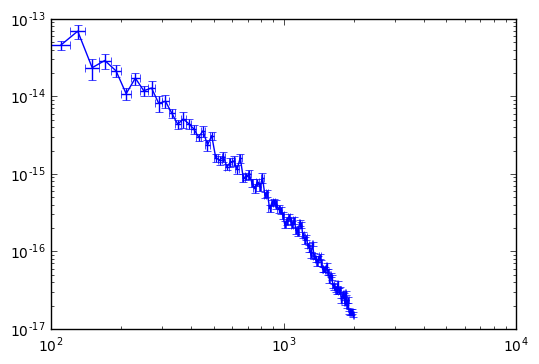

In [138]:
plt.errorbar(l_bin,pow_mean,yerr=pow_std,xerr=10)
plt.xscale('log')
plt.yscale('log')

In [139]:
from scipy.stats import linregress
slope,intercept,_,_,err=linregress(x=np.log(l_bin),y=np.log(pow_mean)) # Properly need to take into account error bars


In [140]:
err

0.054326408678948668

In [141]:
L_slope = slope
A = np.exp(intercept)
ytest = A*l_bin**L_slope

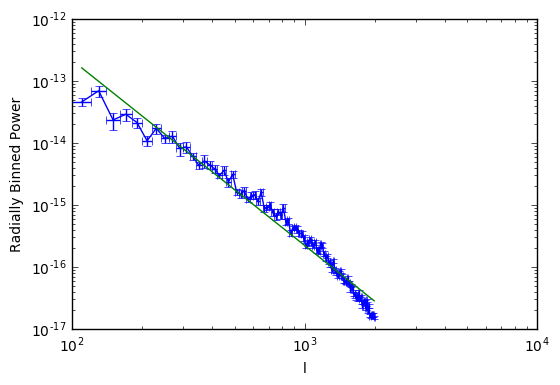

In [148]:
plt.errorbar(l_bin,pow_mean,xerr=10,yerr=pow_std)#,legend='Data')
plt.errorbar(l_bin,ytest)#legend='Polynomial Fit')
plt.xscale('log')
plt.yscale('log')
#plt.legend()
plt.xlabel('l')
plt.ylabel('Radially Binned Power')

In [143]:
L = 1.6e-9
subtrBB = trimBB.copy()
subtrBB.powerMap=np.abs(trimBB.powerMap-A*(1+trimBB.modLMap)**(L_slope))

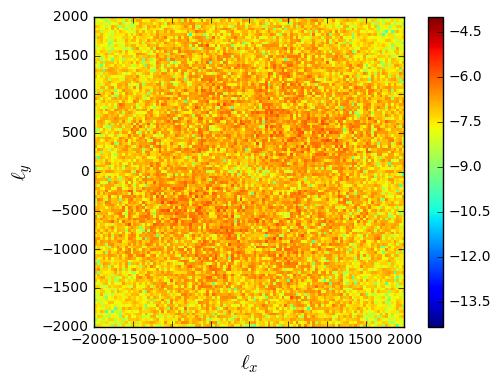

-2.98716066478


In [146]:
BB.plot(show=True,log=True,powerOfL=-L_slope,zoomUptoL=2000)
print L_slope

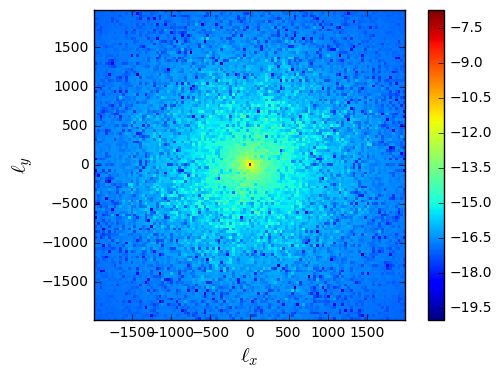

In [147]:
subtrBB.plot(show=True,log=True)

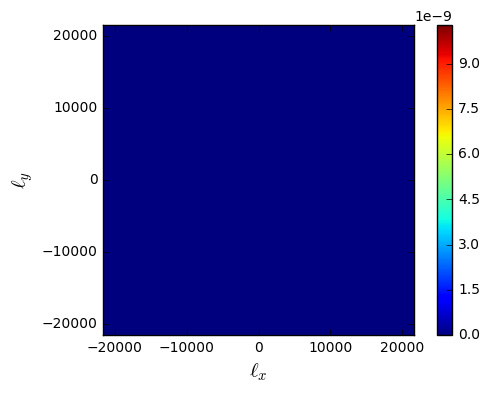

In [156]:
BB.plot()

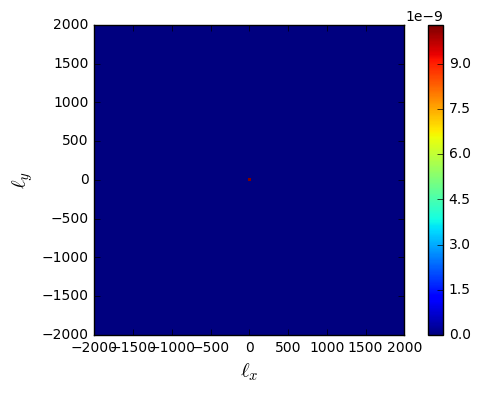

In [158]:
BB.plot(zoomUptoL=2000)